In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("TVshow_data.csv")
df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   36 non-null     int64  
 1   url                  36 non-null     object 
 2   name                 36 non-null     object 
 3   season               36 non-null     int64  
 4   number               36 non-null     int64  
 5   type                 36 non-null     object 
 6   airdate              36 non-null     object 
 7   airtime              36 non-null     object 
 8   runtime              36 non-null     int64  
 9   average_rating       36 non-null     float64
 10  summary              36 non-null     object 
 11  medium_image_link    36 non-null     object 
 12  original_image_link  36 non-null     object 
dtypes: float64(1), int64(4), object(8)
memory usage: 3.8+ KB


In [5]:
# Convert airdate column to datetime format
df["airdate"] = pd.to_datetime(df["airdate"])

### 1. Ratings for each season comparison plot


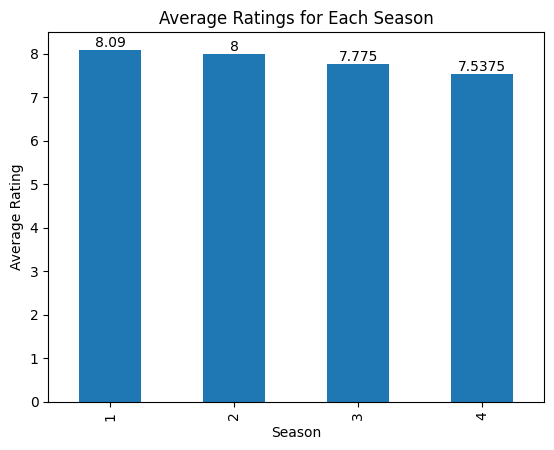

In [15]:
season_ratings = df.groupby("season")["average_rating"].mean()
season_ratings.plot(kind="bar", xlabel="Season", ylabel="Average Rating", title="Average Ratings for Each Season")
ax = plt.gca()
plt.bar_label(ax.containers[0])
plt.show()

<Axes: xlabel='name,season'>

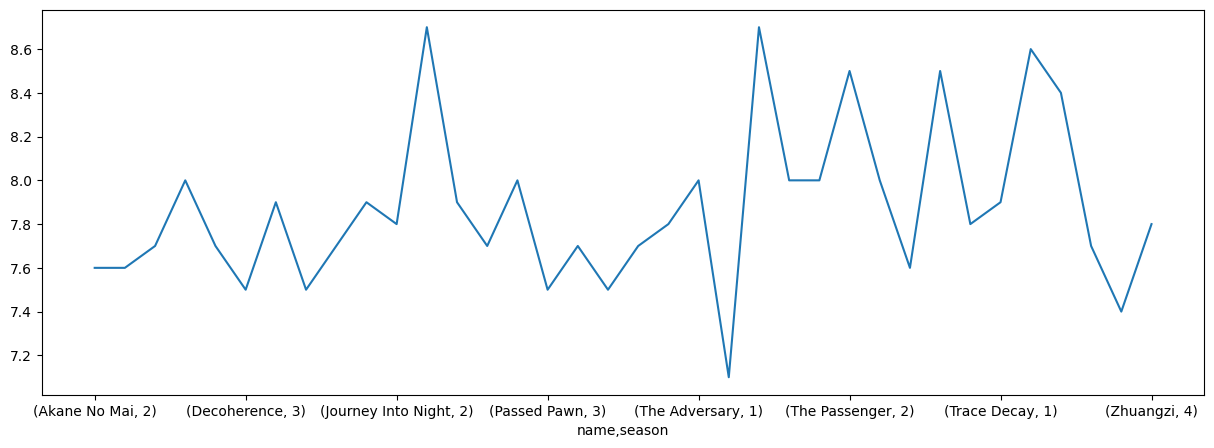

In [17]:
df.groupby(["name", "season"])["average_rating"].sum().plot(figsize=(15, 5))

### 2. Episode names with average rating > 8 for every season

In [13]:
df[df["average_rating"] > 8].name


6                 Trompe L'Oeil
8     The Well-Tempered Clavier
9            The Bicameral Mind
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

### 3. Episode names aired before May 2019

In [10]:
df[df["airdate"] < pd.Timestamp(2019, 5, 1)].name

0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

### 4. Episode names with highest and lowest rating for each season

In [11]:
highest_rated_episodes = df.groupby("season").apply(lambda x: x.loc[x["average_rating"].idxmax()]["name"])
lowest_rated_episodes = df.groupby("season").apply(lambda x: x.loc[x["average_rating"].idxmin()]["name"])
episode_ratings_comparison = pd.DataFrame({
    "Highest Rated Episode": highest_rated_episodes,
    "Lowest Rated Episode": lowest_rated_episodes
})
print("Episode names with highest and lowest rating for each season:")
print(episode_ratings_comparison)

Episode names with highest and lowest rating for each season:
       Highest Rated Episode Lowest Rated Episode
season                                           
1         The Bicameral Mind            The Stray
2                    Kiksuya         Akane No Mai
3               Parce Domine          Decoherence
4                   Zhuangzi         The Auguries


### 5. Summary for the most popular (highest ratings) episode in every season

In [14]:
most_popular_episodes = df.groupby("season").apply(lambda x: x.loc[x["average_rating"].idxmax()]["summary"])
print("Summary for the most popular episode in each season:")
print(most_popular_episodes)

Summary for the most popular episode in each season:
season
1    Delores finds out the truth about William's fa...
2    Another of Westworld's Host revolutionaries is...
3    If you're stuck in a loop, try walking in a st...
4                                        God is bored.
dtype: object
